In [198]:
#to do
# add titles to all the plots
# make sure plot widths/labels are easily readable

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import warnings
warnings.filterwarnings('ignore')

In [8]:
df0 = pd.read_excel("data/Absenteeism_at_work_Project.xls")

In [10]:
df = df0.copy()

In [12]:
df0.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Children                           float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [14]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ", "_")
df.rename(columns={"Work_load_Average/day": "Work_load_Average_per_day"}, inplace=True)
df.dtypes

ID                                   int64
Reason_for_absence                 float64
Month_of_absence                   float64
Day_of_the_week                      int64
Seasons                              int64
Transportation_expense             float64
Distance_from_Residence_to_Work    float64
Service_time                       float64
Age                                float64
Work_load_Average_per_day          float64
Hit_target                         float64
Disciplinary_failure               float64
Education                          float64
Children                           float64
Social_drinker                     float64
Social_smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body_mass_index                    float64
Absenteeism_time_in_hours          float64
dtype: object

In [17]:
pd.set_option("display.float_format", "{:.2f}".format)

In [19]:
df.head()

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,...,Disciplinary_failure,Education,Children,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,11,26.00,7.00,3,1,289.00,36.00,13.00,33.00,239554.00,...,0.00,1.00,2.00,1.00,0.00,1.00,90.00,172.00,30.00,4.00
1,36,0.00,7.00,3,1,118.00,13.00,18.00,50.00,239554.00,...,1.00,1.00,1.00,1.00,0.00,0.00,98.00,178.00,31.00,0.00
2,3,23.00,7.00,4,1,179.00,51.00,18.00,38.00,239554.00,...,0.00,1.00,0.00,1.00,0.00,0.00,89.00,170.00,31.00,2.00
3,7,7.00,7.00,5,1,279.00,5.00,14.00,39.00,239554.00,...,0.00,1.00,2.00,1.00,1.00,0.00,68.00,168.00,24.00,4.00
4,11,23.00,7.00,5,1,289.00,36.00,13.00,33.00,239554.00,...,0.00,1.00,2.00,1.00,0.00,1.00,90.00,172.00,30.00,2.00


In [21]:
#
# Lets check if we have any null values in each column
df.isna().sum()

ID                                  0
Reason_for_absence                  3
Month_of_absence                    1
Day_of_the_week                     0
Seasons                             0
Transportation_expense              7
Distance_from_Residence_to_Work     3
Service_time                        3
Age                                 3
Work_load_Average_per_day          10
Hit_target                          6
Disciplinary_failure                6
Education                          10
Children                            6
Social_drinker                      3
Social_smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body_mass_index                    31
Absenteeism_time_in_hours          22
dtype: int64

In [24]:
# Wha is the median hours of absence ?
median_hrs = df['Absenteeism_time_in_hours'].median()
median_hrs
#
# Since the hours of absence range from 0 to 120, we can define absence as hours taken above the median
# Lets add one more column for absent or not
# 
df['absent'] = np.where(df["Absenteeism_time_in_hours"] > median_hrs, 1, 0)

In [26]:
data = df.copy()

In [28]:
data[data["Month_of_absence"] == 0]

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,...,Education,Children,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,absent
737,4,0.00,0.00,3,1,118.00,14.00,13.00,40.00,271219.00,...,1.00,1.00,1.00,0.00,8.00,98.00,170.00,34.00,0.00,0
738,8,0.00,0.00,4,2,231.00,35.00,14.00,39.00,271219.00,...,1.00,2.00,1.00,0.00,2.00,100.00,170.00,35.00,0.00,0
739,35,0.00,0.00,6,3,179.00,45.00,14.00,53.00,271219.00,...,1.00,1.00,0.00,0.00,1.00,77.00,175.00,25.00,0.00,0


In [30]:
#drop rows with month = 0
data.drop([737, 738, 739], inplace=True)
data[data["Month_of_absence"] == 0]

,ID,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,...,Education,Children,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,absent


In [32]:

category_groups = {
    0: 'Health_Services_and_Patient_Management',
    1: 'Infectious_and_Chronic_Diseases',
    2: 'Infectious_and_Chronic_Diseases',
    3: 'Infectious_and_Chronic_Diseases',
    4: 'Infectious_and_Chronic_Diseases',
    5: 'Infectious_and_Chronic_Diseases',
    6: 'Infectious_and_Chronic_Diseases',
    7: 'Sensory_and_External_Diseases',
    8: 'Sensory_and_External_Diseases',
    9: 'Infectious_and_Chronic_Diseases',
    10: 'Infectious_and_Chronic_Diseases',
    11: 'Infectious_and_Chronic_Diseases',
    12: 'Infectious_and_Chronic_Diseases',
    13: 'Infectious_and_Chronic_Diseases',
    14: 'Infectious_and_Chronic_Diseases',
    15: 'Reproductive_and_Developmental_Health',
    16: 'Reproductive_and_Developmental_Health',
    17: 'Infectious_and_Chronic_Diseases',
    18: 'Health_Services_and_Patient_Management',
    19: 'Sensory_and_External_Diseases',
    20: 'Sensory_and_External_Diseases',
    21: 'Health_Services_and_Patient_Management',
    22: 'Health_Services_and_Patient_Management',
    23: 'Health_Services_and_Patient_Management',
    24: 'Health_Services_and_Patient_Management',
    25: 'Health_Services_and_Patient_Management',
    26: 'Health_Services_and_Patient_Management',
    27: 'Health_Services_and_Patient_Management',
    28: 'Health_Services_and_Patient_Management',
}

data["Reason"] = data["Reason_for_absence"].map(category_groups)

In [34]:
data["Reason"].value_counts()

Reason
Health_Services_and_Patient_Management    499
Infectious_and_Chronic_Diseases           169
Sensory_and_External_Diseases              61
Reproductive_and_Developmental_Health       5
Name: count, dtype: int64

In [36]:
data_1 = pd.get_dummies(data, columns=['Reason'])

In [38]:
data_1.dropna(inplace=True)
data_1.isna().sum()

ID                                               0
Reason_for_absence                               0
Month_of_absence                                 0
Day_of_the_week                                  0
Seasons                                          0
Transportation_expense                           0
Distance_from_Residence_to_Work                  0
Service_time                                     0
Age                                              0
Work_load_Average_per_day                        0
Hit_target                                       0
Disciplinary_failure                             0
Education                                        0
Children                                         0
Social_drinker                                   0
Social_smoker                                    0
Pet                                              0
Weight                                           0
Height                                           0
Body_mass_index                

In [41]:
#
# Remove Reason_for_absence column
data_1.drop('Reason_for_absence', axis=1, inplace=True)

# Remove 'Absenteeism_time_in_hours'
data_1.drop('Absenteeism_time_in_hours', axis=1, inplace=True)

# Remove Height
data_1.drop('Height', axis=1, inplace=True)

# Remove Id
data_1.drop('ID', axis=1, inplace=True)

# Remove Hit_target
data_1.drop('Hit_target', axis=1, inplace=True)

# Remove 'Disciplinary_failure'
data_1.drop('Disciplinary_failure', axis=1, inplace=True)

In [44]:
data_1["Education"] = data_1.Education.map({1: 0, 2: 1, 3: 1, 4: 1})

In [46]:
data_1.Education.value_counts()

Education
0    519
1    117
Name: count, dtype: int64

In [48]:
data_2 = pd.get_dummies(data_1, columns=["Education"], drop_first=True)
data_2.columns

Index(['Month_of_absence', 'Day_of_the_week', 'Seasons',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average_per_day', 'Children',
       'Social_drinker', 'Social_smoker', 'Pet', 'Weight', 'Body_mass_index',
       'absent', 'Reason_Health_Services_and_Patient_Management',
       'Reason_Infectious_and_Chronic_Diseases',
       'Reason_Reproductive_and_Developmental_Health',
       'Reason_Sensory_and_External_Diseases', 'Education_1'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [51]:
X = data_2.drop('absent', axis=1)
y = data_2['absent']

In [54]:
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (636, 19)
y shape: (636,)


In [56]:
#
# Prepare trining and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
X_train.head()

,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average_per_day,Children,Social_drinker,Social_smoker,Pet,Weight,Body_mass_index,Reason_Health_Services_and_Patient_Management,Reason_Infectious_and_Chronic_Diseases,Reason_Reproductive_and_Developmental_Health,Reason_Sensory_and_External_Diseases,Education_1
425,5.00,2,3,235.00,20.00,13.00,43.00,246074.00,1.00,1.00,0.00,0.00,106.00,38.00,False,True,False,False,False
121,1.00,2,2,118.00,10.00,10.00,37.00,308593.00,0.00,0.00,0.00,0.00,83.00,28.00,True,False,False,False,False
677,5.00,4,3,118.00,10.00,10.00,37.00,237656.00,0.00,0.00,0.00,0.00,83.00,28.00,False,False,False,True,False
692,5.00,2,3,155.00,12.00,14.00,34.00,237656.00,2.00,1.00,0.00,0.00,95.00,25.00,False,True,False,False,False
262,8.00,5,1,179.00,26.00,9.00,30.00,265615.00,0.00,0.00,0.00,0.00,56.00,19.00,True,False,False,False,True


In [60]:
y_train[:5]

425    1
121    0
677    0
692    1
262    0
Name: absent, dtype: int32

In [62]:

#
#  Scale using Statndared Scaler
#
pipe = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('std_scaler', StandardScaler())
])

X_train = pipe.fit_transform(X_train)
X_test = pipe.transform(X_test)

In [64]:
X_train[:2]

array([[-3.81094299e-01, -1.27236390e+00,  4.55229090e-01,
         1.90615269e-01, -6.18432879e-01,  1.05187245e-01,
         9.81934523e-01, -6.12126456e-01,  2.20308145e-03,
         9.15883713e-01, -3.05558658e-01, -5.95712349e-01,
         2.12059468e+00,  2.64506145e+00, -1.38148353e+00,
         1.71407500e+00, -8.23852555e-02, -3.01141619e-01,
        -4.96486253e-01],
       [-1.60776311e+00, -1.27236390e+00, -4.53187704e-01,
        -1.62305140e+00, -1.32012240e+00, -5.73194264e-01,
         7.75657143e-02,  9.65043400e-01, -9.78168162e-01,
        -1.09184167e+00, -3.05558658e-01, -5.95712349e-01,
         3.16264598e-01,  3.10103416e-01,  7.23859519e-01,
        -5.83405044e-01, -8.23852555e-02, -3.01141619e-01,
        -4.96486253e-01]])

In [66]:

# function for evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from IPython.display import display, HTML

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("    TRAINING RESULTS:\n")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))

    cm = confusion_matrix(y_train, y_train_pred)
    #print(f"CONFUSION MATRIX:\n{cm}")

    print(f"        Confusion Matrix")
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
    fig, ax = plt.subplots(figsize=(3,3))
    cm_display.plot(ax=ax, cmap='Blues')
    plt.show()

    print(f"    Accuracy Score:{accuracy_score(y_train, y_train_pred):.4f}")
    print()
    print(f"    Classification Report")
    display(clf_report)

    print("    EVALUATION REPORT: \n")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    #print(f"CONFUSION MATRIX:\n{)}")
    cm = confusion_matrix(y_test, y_test_pred)
    print(f"       Confusion Matrix")
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
    fig, ax = plt.subplots(figsize=(3,3))
    cm_display.plot(ax=ax)
    plt.show()


    print(f"    Accuracy Report:{accuracy_score(y_test, y_test_pred):.4f}")
    print()
    print(f"    Classification Report")
    display(clf_report)

In [68]:
#
# 
from sklearn.linear_model import LogisticRegression
#
print("\n LOGISTIC REGRESSION")
lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)



 LOGISTIC REGRESSION


LogisticRegression(penalty='l1', solver='liblinear')

    TRAINING RESULTS:

        Confusion Matrix


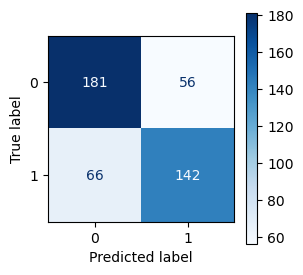

    Accuracy Score:0.7258

    Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.73,0.72,0.73,0.72,0.73
recall,0.76,0.68,0.73,0.72,0.73
f1-score,0.75,0.70,0.73,0.72,0.73
support,237.00,208.00,0.73,445.00,445.00


    EVALUATION REPORT: 

       Confusion Matrix


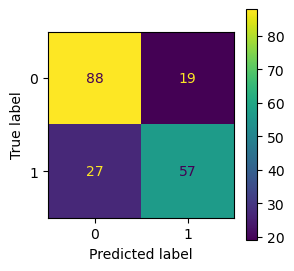

    Accuracy Report:0.7592

    Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.77,0.75,0.76,0.76,0.76
recall,0.82,0.68,0.76,0.75,0.76
f1-score,0.79,0.71,0.76,0.75,0.76
support,107.00,84.00,0.76,191.00,191.00


In [70]:
#
# Run Evaluation
evaluate(lr_clf, X_train, X_test, y_train, y_test)

In [72]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.title("Precision/Recall Tradeoff")
    
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
def plot_PR_curve(precisions, recalls):
    plt.plot(precisions, recalls)
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    plt.title("PR Curve: precisions/recalls tradeoff");

def plot_curves(classifier):
    precisions, recalls, thresholds = precision_recall_curve(y_test, classifier.predict(X_test))
    plt.figure(figsize=(10, 20))
    plt.subplot(4, 2, 1)
    plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
    
    plt.subplot(4, 2, 2)
    plot_PR_curve(precisions, recalls)
    
    plt.subplot(4, 2, 3)
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict(X_test))
    plot_roc_curve(fpr, tpr)

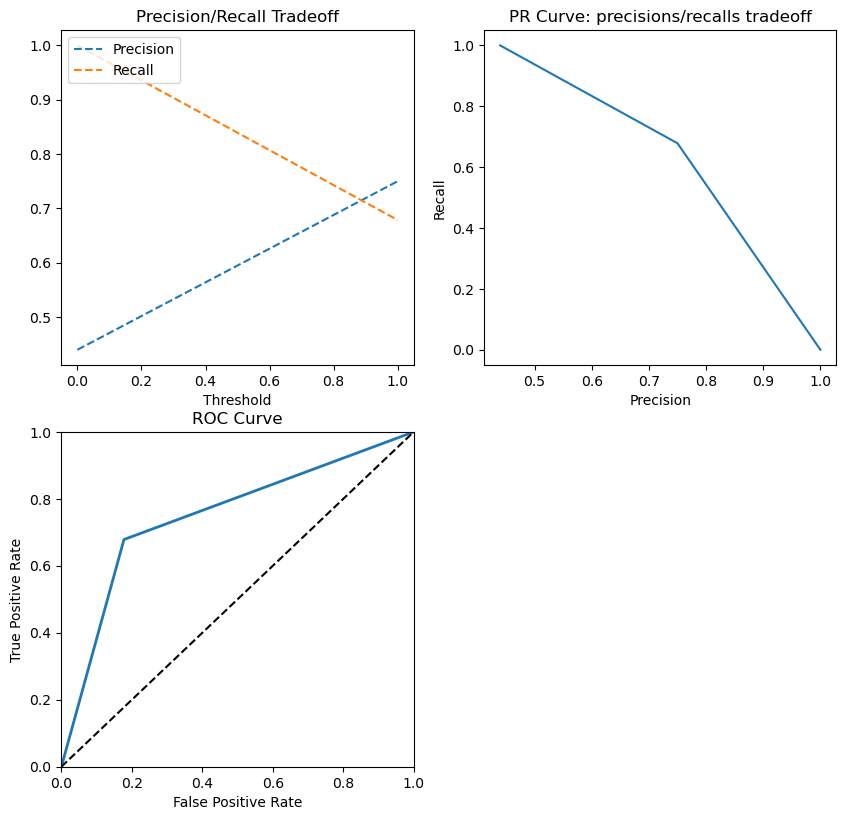

In [74]:
#
#  Plot the ROC Curves
#
plot_curves(lr_clf)

In [76]:
scores = cross_val_score(lr_clf, X_train, y_train, cv=10)

print(f"Scores: {scores}")
print(f"Cross-Validation score mean: {scores.mean() * 100:.2f}% (+/-{scores.std() * 100:.2f})")

Scores: [0.66666667 0.77777778 0.62222222 0.64444444 0.73333333 0.65909091
 0.75       0.65909091 0.79545455 0.70454545]
Cross-Validation score mean: 70.13% (+/-5.69)


In [78]:
def coefficients(model):
    feature_name = X.columns
    summary_table = pd.DataFrame(columns=["Features_name"], data=feature_name)
    summary_table["Coefficients"] = np.transpose(model.coef_)
    summary_table.index = summary_table.index + 1
    summary_table.loc[0] = ['Intercept', model.intercept_[0]]
    summary_table.sort_index(inplace=True)
    summary_table["Odds_ratio"] = np.exp(summary_table.Coefficients)
    summary_table.sort_values(by="Odds_ratio", ascending=False, inplace=True)
    return summary_table

In [80]:
coefficients(lr_clf)


,Features_name,Coefficients,Odds_ratio
4,Transportation_expense,0.46,1.59
9,Children,0.46,1.58
13,Weight,0.25,1.29
1,Month_of_absence,0.17,1.18
10,Social_drinker,0.07,1.07
18,Reason_Sensory_and_External_Diseases,0.04,1.04
8,Work_load_Average_per_day,0.02,1.02
16,Reason_Infectious_and_Chronic_Diseases,0.00,1.00
14,Body_mass_index,0.00,1.00
19,Education_1,0.00,1.00


In [86]:
#
# The Transportation_expense has the highest Odds Ratio. This is a higher predictor for absence
#

#
#### RANDOM FOREST

In [89]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf, 
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=5, verbose=10, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)



Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Best parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


RandomForestClassifier(max_depth=10, max_features='auto', min_samples_leaf=2,
                       min_samples_split=5)

    TRAINING RESULTS:

        Confusion Matrix


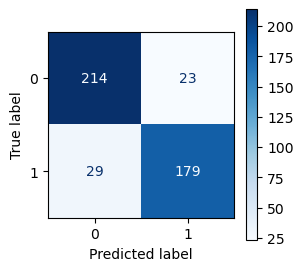

    Accuracy Score:0.8831

    Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.88,0.89,0.88,0.88,0.88
recall,0.90,0.86,0.88,0.88,0.88
f1-score,0.89,0.87,0.88,0.88,0.88
support,237.00,208.00,0.88,445.00,445.00


    EVALUATION REPORT: 

       Confusion Matrix


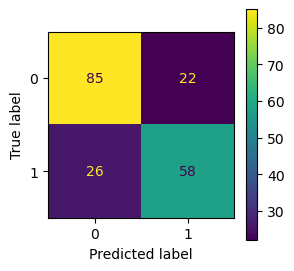

    Accuracy Report:0.7487

    Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.77,0.72,0.75,0.75,0.75
recall,0.79,0.69,0.75,0.74,0.75
f1-score,0.78,0.71,0.75,0.74,0.75
support,107.00,84.00,0.75,191.00,191.00


In [97]:
evaluate(rf_clf, X_train, X_test, y_train, y_test)

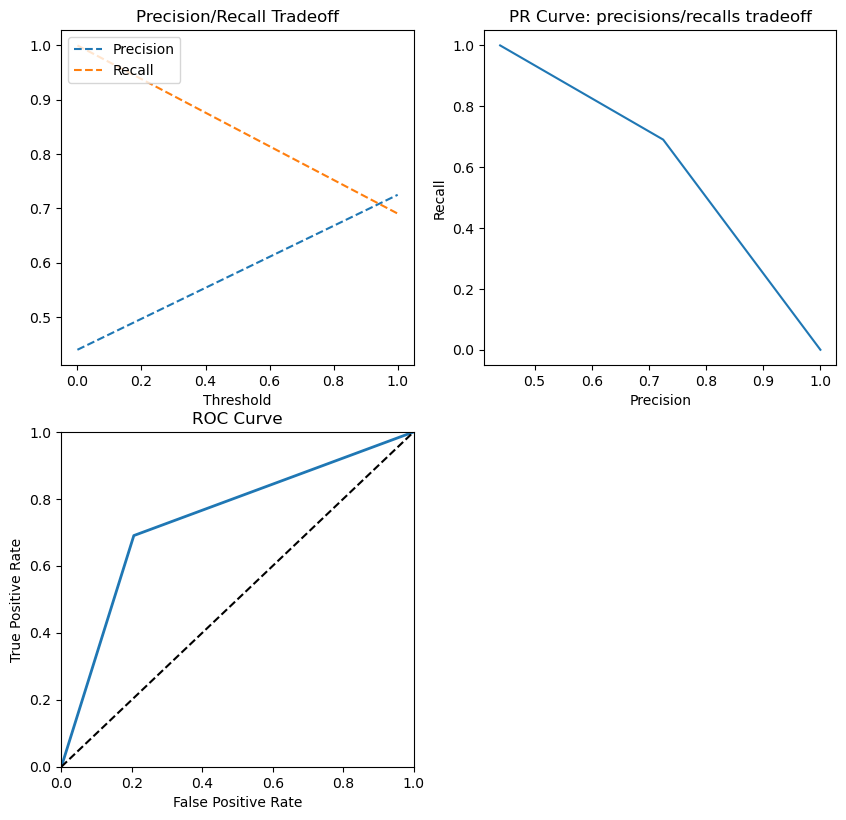

In [99]:
plot_curves(rf_clf)

### XGBOOST

In [102]:
import xgboost as xgb
from sklearn.svm import SVC


In [176]:

n_estimators = [100, 250]
max_depth = [3, 5]
base_score = [0.25, 0.5, 0.75]
learning_rate = [0.05, 0.1]
min_child_weight = [3, 5]
subsample = [0.5, 0.75, 0.85, 0.9, 1]

params_grid = {
    'n_estimators': n_estimators, 
    'max_depth': max_depth,
    'learning_rate' : learning_rate, 
    'min_child_weight' : min_child_weight, 
    'base_score' : base_score,
    'subsample': subsample,
}


In [166]:
xgb_clf = xgb.XGBClassifier()

xgb_cv = GridSearchCV(xgb_clf, params_grid, cv=5, scoring='f1', verbose=0)
xgb_cv.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'base_score': [0.25, 0.5, 0.75],
                         'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'min_child_weight': [3, 5], 'n_estimators': [100, 250],
                         'subsample': [0.5, 0.75, 0.85, 0.9, 1]},
             scoring='f1')

In [168]:
best_params = xgb_cv.best_params_
print(f"Best paramters: {best_params}")

Best paramters: {'base_score': 0.5, 'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.85}


In [170]:
xgb_clf = xgb.XGBClassifier(**best_params)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

    TRAINING RESULTS:

        Confusion Matrix


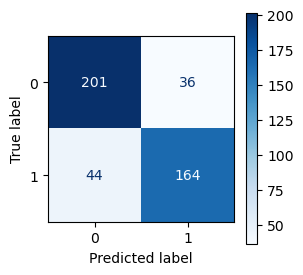

    Accuracy Score:0.8202

    Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.82,0.82,0.82,0.82,0.82
recall,0.85,0.79,0.82,0.82,0.82
f1-score,0.83,0.80,0.82,0.82,0.82
support,237.00,208.00,0.82,445.00,445.00


    EVALUATION REPORT: 

       Confusion Matrix


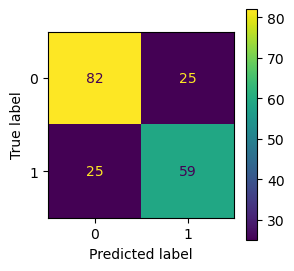

    Accuracy Report:0.7382

    Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.77,0.70,0.74,0.73,0.74
recall,0.77,0.70,0.74,0.73,0.74
f1-score,0.77,0.70,0.74,0.73,0.74
support,107.00,84.00,0.74,191.00,191.00


In [172]:
evaluate(xgb_clf, X_train, X_test, y_train, y_test)

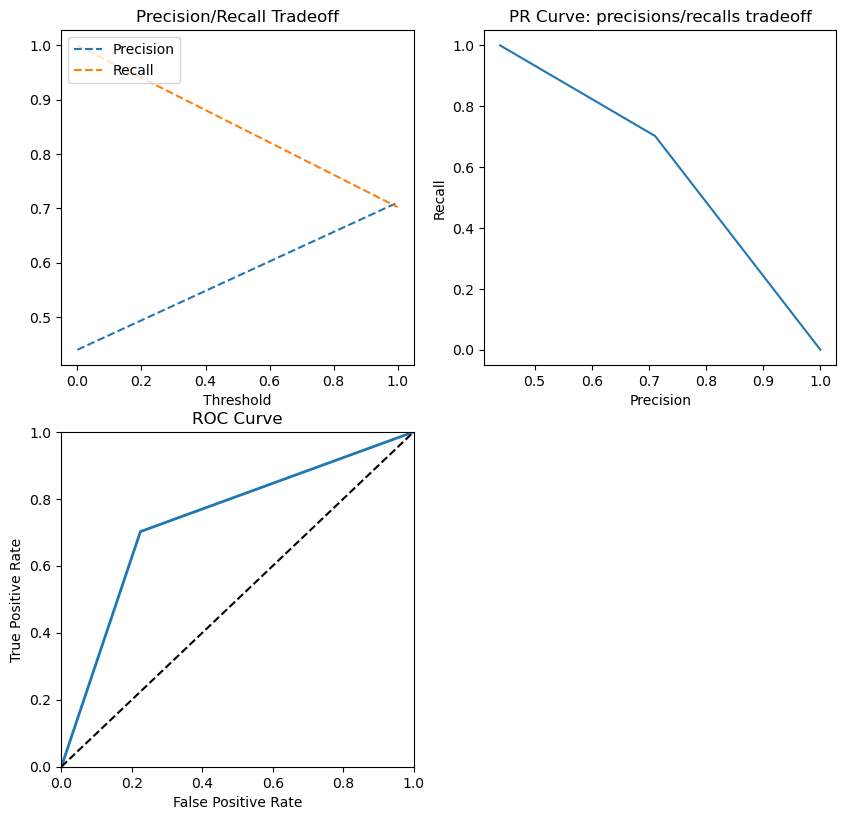

In [116]:
plot_curves(xgb_clf)

#### SUPPORT VECTOR MACHINE

In [119]:
from sklearn.svm import SVC

In [178]:
param_grid = {
    'C': [60, 70, 75, 65 ], 
    'gamma': [0.002, 0.001, 0.0009, 0.0008, 0.0007], 
    'kernel': ['rbf', 'poly', 'linear']
} 

In [180]:
#
# Find best parameters using grid search
svm_cv = GridSearchCV(SVC(), param_grid, scoring='f1', verbose=0, cv=5)
svm_cv.fit(X_train, y_train)

best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

Best params: {'C': 60, 'gamma': 0.002, 'kernel': 'linear'}


    TRAINING RESULTS:

        Confusion Matrix


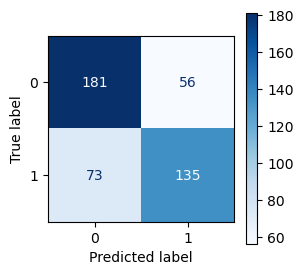

    Accuracy Score:0.7101

    Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.71,0.71,0.71,0.71,0.71
recall,0.76,0.65,0.71,0.71,0.71
f1-score,0.74,0.68,0.71,0.71,0.71
support,237.00,208.00,0.71,445.00,445.00


    EVALUATION REPORT: 

       Confusion Matrix


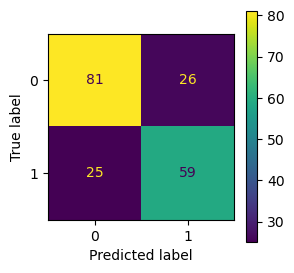

    Accuracy Report:0.7330

    Classification Report


,0,1,accuracy,macro avg,weighted avg
precision,0.76,0.69,0.73,0.73,0.73
recall,0.76,0.70,0.73,0.73,0.73
f1-score,0.76,0.70,0.73,0.73,0.73
support,107.00,84.00,0.73,191.00,191.00


In [181]:
#
# Train Using Best Parameters
svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)
evaluate(svm_clf, X_train, X_test, y_train, y_test)

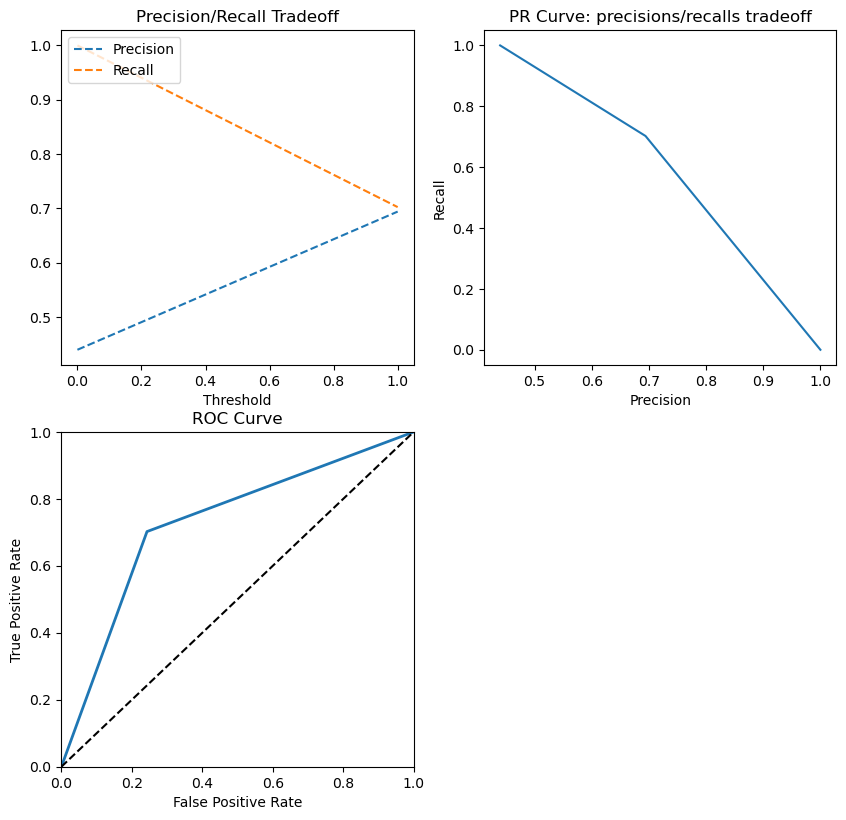

In [183]:
plot_curves(svm_clf)

#
### Compare Model results

In [188]:
ml_models = {
    'Logistic Regression': lr_clf, 
    'Random Forest': rf_clf, 
    'XGboost': xgb_clf, 
    'Support Vector Machine': svm_clf
}
scores_dict = {}
for model in ml_models:
    train_preds = ml_models[model].predict(X_train)
    test_preds  = ml_models[model].predict(X_test)
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy  = accuracy_score(y_test, test_preds)
    roc_auc_score_res  = roc_auc_score(y_test, test_preds)
    print(f"  {model} roc_auc_score", roc_auc_score_res)

    scores_dict[model] = {'Train': train_accuracy, 'Test': test_accuracy }
 

  Logistic Regression roc_auc_score 0.7505006675567423
  Random Forest roc_auc_score 0.7424343569203382
  XGboost roc_auc_score 0.7343680462839342
  Support Vector Machine roc_auc_score 0.7296951490876724


In [190]:
all_model_res = pd.DataFrame(scores_dict)
all_model_res

,Logistic Regression,Random Forest,XGboost,Support Vector Machine
Train,0.73,0.88,0.82,0.71
Test,0.76,0.75,0.74,0.73


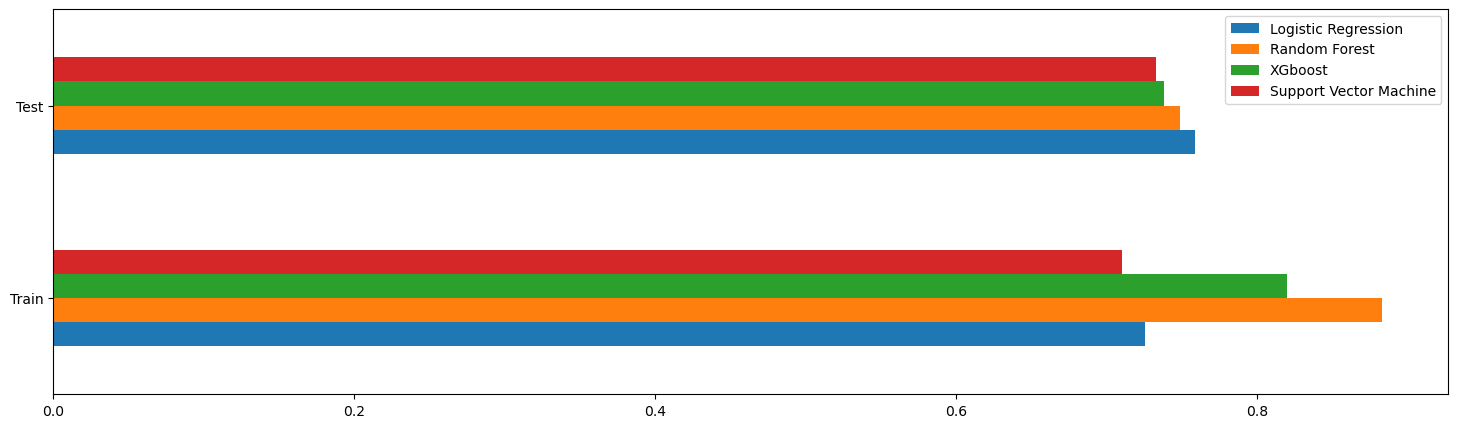

In [192]:

all_model_res.plot(kind='barh', figsize=(18, 5));
